In [1]:
# Import our dependencies
import pandas as pd
import tensorflow as tf
import sklearn as skl
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#  Import and read the Kaggle restaurant dataset csv.
restaurants_df = pd.read_csv("restaurants.csv")
restaurants_df.head()

,id,position,name,score,ratings,category,price_range,full_address,zip_code,lat,lng
0,1,19,PJ Fresh (224 Daniel Payne Drive),NaN,NaN,"Burgers, American, Sandwiches",$,"224 Daniel Payne Drive, Birmingham, AL, 35207",35207,33.562365,-86.830703
1,2,9,J' ti`'z Smoothie-N-Coffee Bar,NaN,NaN,"Coffee and Tea, Breakfast and Brunch, Bubble Tea",NaN,"1521 Pinson Valley Parkway, Birmingham, AL, 35217",35217,33.583640,-86.773330
2,3,6,Philly Fresh Cheesesteaks (541-B Graymont Ave),NaN,NaN,"American, Cheesesteak, Sandwiches, Alcohol",$,"541-B Graymont Ave, Birmingham, AL, 35204",35204,33.509800,-86.854640
3,4,17,Papa Murphy's (1580 Montgomery Highway),NaN,NaN,Pizza,$,"1580 Montgomery Highway, Hoover, AL, 35226",35226,33.404439,-86.806614
4,5,162,Nelson Brothers Cafe (17th St N),4.7,22.0,"Breakfast and Brunch, Burgers, Sandwiches",NaN,"314 17th St N, Birmingham, AL, 35203",35203,33.514730,-86.811700


In [3]:
#  Check dataset data types
restaurants_df.dtypes

id                int64
position          int64
name             object
score           float64
ratings         float64
category         object
price_range      object
full_address     object
zip_code         object
lat             float64
lng             float64
dtype: object

In [4]:
# Determine the number of unique values in each column
restaurants_df.nunique()

id              40227
position          300
name            38863
score              33
ratings           416
category        10647
price_range         4
full_address    35302
zip_code         2281
lat             36780
lng             36745
dtype: int64

In [5]:
#  Check rows with null values
for column in restaurants_df.columns:
    print(f'Column {column} has {restaurants_df[column].isnull().sum()} null values')

Column id has 0 null values
Column position has 0 null values
Column name has 0 null values
Column score has 17973 null values
Column ratings has 17973 null values
Column category has 23 null values
Column price_range has 6646 null values
Column full_address has 278 null values
Column zip_code has 287 null values
Column lat has 0 null values
Column lng has 0 null values


#### Kaggle Data Definition 

* id (Restaurant id)
* position (Restaurant position in the search result)
* name (Restaurant name)
* score (Restaurant score)
* ratings (Ratings count)
* category (Restaurant category)
* price_range (Restaurant price range (1 = Inexpensive, 2 = Moderately expensive, 3 = Expensive, 4 = Very Expensive)
* full_address (Restaurant full address)
* zip_code (Zip code)
* lat (Latitude)
* long (Longitude)

In [6]:
#  Drop records with null values
df = restaurants_df.dropna(how='any')
df.head()

,id,position,name,score,ratings,category,price_range,full_address,zip_code,lat,lng
6,7,27,Jinsei Sushi,4.7,63.0,"Sushi, Asian, Japanese",$,"1830 29th Ave S, Birmingham, AL, 35209",35209,33.480440,-86.790440
13,14,51,Panera (521 Fieldstown Road),4.6,44.0,"Breakfast and Brunch, salad, Sandwich, Family ...",$,"521 Fieldstown Road, Gardendale, AL, 35071",35071,33.651407,-86.819247
15,16,88,Jeni's Splendid Ice Cream (Pepper Place),5.0,20.0,"Ice Cream &amp; Frozen Yogurt, Comfort Food, D...",$$$,"219 29th St S, Birmingham, AL, 35233",35233,33.516600,-86.789950
18,19,30,Falafel Cafe,4.9,48.0,"Middle Eastern, Mediterranean, Vegetarian, Gre...",$,"401 19th St S, Birmingham, AL, 35233",35233,33.508353,-86.803170
19,20,40,MrBeast Burger (838 Odum Road),3.7,19.0,"American, Burgers, Sandwich",$$,"838 Odum Road, Gardendale, AL, 35071",35071,33.645480,-86.826260


#### Features
* position (Restaurant position in the search result)
* score (Restaurant score)
* ratings (Ratings count)
* category (Restaurant category)
* price_range (Restaurant price range (1 = Inexpensive, 2 = Moderately expensive, 3 = Expensive, 4 = Very Expensive)
* zip_code (Zip code)

In [7]:
# Determine the number of unique values in each column.
df["score"].value_counts()

4.7    3399
4.8    3255
4.6    2861
4.5    2310
4.4    1644
4.9    1535
4.3    1146
4.2     874
4.1     540
5.0     469
4.0     321
3.9     251
3.8     165
3.7      97
3.6      68
3.5      51
3.2      31
3.4      31
3.3      16
3.1      11
2.9      10
3.0       9
2.7       9
2.8       6
2.1       3
2.6       2
2.5       1
2.2       1
2.4       1
1.3       1
Name: score, dtype: int64

In [8]:
# Determine the number of unique values in each column.
df["ratings"].value_counts()

200.0    866
100.0    423
11.0     385
10.0     385
12.0     378
        ... 
454.0      1
495.0      1
463.0      1
307.0      1
392.0      1
Name: ratings, Length: 409, dtype: int64

In [9]:
# Determine the number of unique values in each column.
df["position"].value_counts()

1      530
2      486
3      479
4      430
5      398
      ... 
292      5
299      4
291      3
287      2
298      1
Name: position, Length: 300, dtype: int64

In [10]:
# Determine the number of unique values in each column.
df["category"].value_counts()

American, Burgers, Fast Food                                                                                                                                            556
Burritos, Fast Food, Mexican                                                                                                                                            344
Burgers, American, Sandwiches                                                                                                                                           331
Fast Food, Sandwich, American                                                                                                                                           315
Mexican, Latin American, New Mexican                                                                                                                                    289
                                                                                                                                            

In [11]:
# Determine the number of unique values in each column.
df["price_range"].value_counts()

$       14548
$$       4460
$$$       101
$$$$        9
Name: price_range, dtype: int64

In [12]:
# Determine the number of unique values in each column.
df["zip_code"].value_counts()

22314         112
98105         109
22192         100
22201          94
22030          92
             ... 
35020           1
22046-4412      1
22180-5727      1
24290           1
78744-1320      1
Name: zip_code, Length: 1373, dtype: int64

In [13]:
# Determine the number of unique values in each column.
df["name"].value_counts()

Everyday Needs by Gopuff                    26
Kung Fu Tea                                 19
The Ice Cream Shop                          16
Pollo Regio                                 15
Panera Bread                                12
                                            ..
Cafe Turko                                   1
Koku Cafe + Market                           1
Bounty Kitchen (Queen Anne)                  1
Eltana Wood-Fired Bagel Cafe (Stone Way)     1
Beijing Wok                                  1
Name: name, Length: 18803, dtype: int64

#### Features
* position (Restaurant position in the search result)
* score (Restaurant score)
* ratings (Ratings count)
* category (Restaurant category)
* price_range (Restaurant price range (1 = Inexpensive, 2 = Moderately expensive, 3 = Expensive, 4 = Very Expensive)
* zip_code (Zip code)

In [14]:
# Determine the number of unique values in each column
df.nunique()

id              19118
position          300
name            18803
score              30
ratings           409
category         5576
price_range         4
full_address    17835
zip_code         1373
lat             18595
lng             18586
dtype: int64

In [15]:
# Drop the non-beneficial ID columns
final_df = df.drop(columns=["full_address","lat","lng"])
final_df.head()

,id,position,name,score,ratings,category,price_range,zip_code
6,7,27,Jinsei Sushi,4.7,63.0,"Sushi, Asian, Japanese",$,35209
13,14,51,Panera (521 Fieldstown Road),4.6,44.0,"Breakfast and Brunch, salad, Sandwich, Family ...",$,35071
15,16,88,Jeni's Splendid Ice Cream (Pepper Place),5.0,20.0,"Ice Cream &amp; Frozen Yogurt, Comfort Food, D...",$$$,35233
18,19,30,Falafel Cafe,4.9,48.0,"Middle Eastern, Mediterranean, Vegetarian, Gre...",$,35233
19,20,40,MrBeast Burger (838 Odum Road),3.7,19.0,"American, Burgers, Sandwich",$$,35071


In [16]:
#  Import and read the Kaggle restaurant menu dataset csv.
menu_df = pd.read_csv("restaurant-menus.csv")
menu_df.head()

,restaurant_id,category,name,description,price
0,1,Extra Large Pizza,Extra Large Meat Lovers,Whole pie.,15.99 USD
1,1,Extra Large Pizza,Extra Large Supreme,Whole pie.,15.99 USD
2,1,Extra Large Pizza,Extra Large Pepperoni,Whole pie.,14.99 USD
3,1,Extra Large Pizza,Extra Large BBQ Chicken &amp; Bacon,Whole Pie,15.99 USD
4,1,Extra Large Pizza,Extra Large 5 Cheese,Whole pie.,14.99 USD


In [17]:
#  Split the price column between price and currency
menu_df[['unit_price','currency']] = menu_df['price'].str.split(' ', 1, expand=True)
menu_df.head()

,restaurant_id,category,name,description,price,unit_price,currency
0,1,Extra Large Pizza,Extra Large Meat Lovers,Whole pie.,15.99 USD,15.99,USD
1,1,Extra Large Pizza,Extra Large Supreme,Whole pie.,15.99 USD,15.99,USD
2,1,Extra Large Pizza,Extra Large Pepperoni,Whole pie.,14.99 USD,14.99,USD
3,1,Extra Large Pizza,Extra Large BBQ Chicken &amp; Bacon,Whole Pie,15.99 USD,15.99,USD
4,1,Extra Large Pizza,Extra Large 5 Cheese,Whole pie.,14.99 USD,14.99,USD


In [18]:
#  Check the data types to see if conversion to float is needed
menu_df.dtypes

restaurant_id     int64
category         object
name             object
description      object
price            object
unit_price       object
currency         object
dtype: object

In [19]:
#  Convert unit price data type from object to float
menu_df['unit_price'] = menu_df['unit_price'].astype('float')
menu_df.dtypes

restaurant_id      int64
category          object
name              object
description       object
price             object
unit_price       float64
currency          object
dtype: object

In [20]:
# Summarize by restaurant and obtain the cheapest, most expensive and average price per plate
restaurant_group = menu_df.groupby(['restaurant_id'])
cheapest = restaurant_group['unit_price'].min()
most_expensive = restaurant_group['unit_price'].max()
average = restaurant_group['unit_price'].mean()

plate_df = pd.DataFrame({"cheapest_plate": cheapest,
                         "most_expensive_plate" : most_expensive,
                         "average_plate": average})
plate_df.head()

,cheapest_plate,most_expensive_plate,average_plate
restaurant_id,,,
1,1.89,16.99,5.663684
2,0.60,8.49,5.505333
3,3.00,16.78,10.762143
4,2.49,16.99,10.531892
5,1.00,20.00,4.532576


In [21]:
# Create another id column using the index value to align with restaurant df in preparation for merging
plate_df['id'] = plate_df.index
plate_df.head()

,cheapest_plate,most_expensive_plate,average_plate,id
restaurant_id,,,,
1,1.89,16.99,5.663684,1
2,0.60,8.49,5.505333,2
3,3.00,16.78,10.762143,3
4,2.49,16.99,10.531892,4
5,1.00,20.00,4.532576,5


In [22]:
restaurants_df = pd.merge(final_df, plate_df, on = 'id', how = 'left')
restaurants_df.head()

,id,position,name,score,ratings,category,price_range,zip_code,cheapest_plate,most_expensive_plate,average_plate
0,7,27,Jinsei Sushi,4.7,63.0,"Sushi, Asian, Japanese",$,35209,5.00,60.00,13.445946
1,14,51,Panera (521 Fieldstown Road),4.6,44.0,"Breakfast and Brunch, salad, Sandwich, Family ...",$,35071,0.00,45.79,9.504055
2,16,88,Jeni's Splendid Ice Cream (Pepper Place),5.0,20.0,"Ice Cream &amp; Frozen Yogurt, Comfort Food, D...",$$$,35233,2.35,14.00,13.024194
3,19,30,Falafel Cafe,4.9,48.0,"Middle Eastern, Mediterranean, Vegetarian, Gre...",$,35233,0.00,9.49,4.796667
4,20,40,MrBeast Burger (838 Odum Road),3.7,19.0,"American, Burgers, Sandwich",$$,35071,2.49,16.99,9.023333


In [30]:
#  Drop records with null values
df = restaurants_df.dropna(how='any')
df

,id,position,name,score,ratings,category,price_range,zip_code,cheapest_plate,most_expensive_plate,average_plate
0,7,27,Jinsei Sushi,4.7,63.0,"Sushi, Asian, Japanese",$,35209,5.00,60.00,13.445946
1,14,51,Panera (521 Fieldstown Road),4.6,44.0,"Breakfast and Brunch, salad, Sandwich, Family ...",$,35071,0.00,45.79,9.504055
2,16,88,Jeni's Splendid Ice Cream (Pepper Place),5.0,20.0,"Ice Cream &amp; Frozen Yogurt, Comfort Food, D...",$$$,35233,2.35,14.00,13.024194
3,19,30,Falafel Cafe,4.9,48.0,"Middle Eastern, Mediterranean, Vegetarian, Gre...",$,35233,0.00,9.49,4.796667
4,20,40,MrBeast Burger (838 Odum Road),3.7,19.0,"American, Burgers, Sandwich",$$,35071,2.49,16.99,9.023333
...,...,...,...,...,...,...,...,...,...,...,...
19113,40223,54,Mangia la pasta! (5610 N Interstate Hwy 35),4.8,500.0,"Pasta, Comfort Food, Italian, Group Friendly",$,78751,1.50,19.99,9.786721
19114,40224,53,Wholly Cow Burgers (S Lamar),4.6,245.0,"American, Burgers, Breakfast and Brunch, Aller...",$,78704,1.00,13.99,5.228919
19115,40225,52,EurAsia Ramen 3,4.7,293.0,"Sushi, Asian, Japanese, Exclusive to Eats, Gro...",$,78756,0.00,21.60,7.648000
19116,40226,51,Austin's Habibi (5th St),4.7,208.0,"Mediterranean, Gluten Free Friendly, Allergy F...",$$,78703,1.50,40.00,9.583509


In [8]:
# Create the model and fit the model to the data

from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [17]:
y = final_df['position']
X = final_df['ratings'].values
X = X.reshape(-1,1)

In [18]:
model.fit(X, y)


print(model)

LinearRegression()


In [19]:
ratings = model.score(X,y)

In [20]:
#this is so i know my line of best fit numbers
print(model.coef_)
print(model.intercept_)
print(f'Model equation is: y = {model.coef_}x + {model.intercept_}')

[0.03930486]
67.15461039597646
Model equation is: y = [0.03930486]x + 67.15461039597646


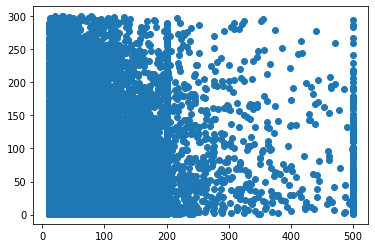

In [21]:
plt.scatter(X, y)

In [22]:
x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

Min X Value: [[10.]]
Max X Value: [[500.]]


In [23]:
y_min = model.predict(x_min)
y_max = model.predict(x_max)

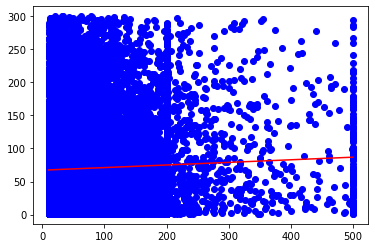

In [24]:
plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')

In [9]:
def changeprice(price):
    if price=="$":
        return 1
    elif price=="$$":
        return 2
    elif price=="$$$":
        return 3
    elif price=="$$$$":
        return 4
final_df["price_range"]=final_df["price_range"].apply(changeprice)
final_df=final_df.reset_index()
final_df

,index,position,score,ratings,category,price_range,zip_code
0,6,27,4.7,63.0,"Sushi, Asian, Japanese",1,35209
1,13,51,4.6,44.0,"Breakfast and Brunch, salad, Sandwich, Family ...",1,35071
2,15,88,5.0,20.0,"Ice Cream &amp; Frozen Yogurt, Comfort Food, D...",3,35233
3,18,30,4.9,48.0,"Middle Eastern, Mediterranean, Vegetarian, Gre...",1,35233
4,19,40,3.7,19.0,"American, Burgers, Sandwich",2,35071
...,...,...,...,...,...,...,...
19113,40222,54,4.8,500.0,"Pasta, Comfort Food, Italian, Group Friendly",1,78751
19114,40223,53,4.6,245.0,"American, Burgers, Breakfast and Brunch, Aller...",1,78704
19115,40224,52,4.7,293.0,"Sushi, Asian, Japanese, Exclusive to Eats, Gro...",1,78756
19116,40225,51,4.7,208.0,"Mediterranean, Gluten Free Friendly, Allergy F...",2,78703


In [26]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [10]:
y = final_df['position'].values
X = final_df['price_range'].values
X = X.reshape(-1,1)

In [11]:
model.fit(X, y)


print(model)

LinearRegression()


In [12]:
price_range = model.score(X,y)

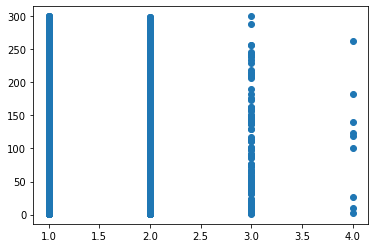

In [13]:
plt.scatter(X, y)

In [30]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [31]:
y = final_df['position'].values
X = final_df['score'].values
X = X.reshape(-1,1)

In [32]:
model.fit(X, y)


print(model)

LinearRegression()


In [33]:
score = model.score(X,y)

In [34]:
score

0.010205521989275157

<BarContainer object of 3 artists>

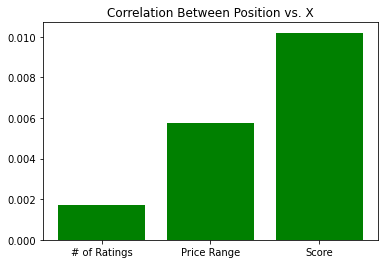

In [39]:
names = ['# of Ratings', 'Price Range', 'Score']
values = [ratings, price_range, score]
plt.title('Correlation Between Position vs. X')
plt.bar(names, values, color = 'g')

In [36]:
# Create a column for target
# Definition: score over 4.0, position in search results over 10
# final_df['success'] = 0
# final_df.loc[final_df['position'] <= 10 & final_df['score'] >= 4.0, 'success'] = 1
# final_df.head()

In [37]:
# Convert categorical data to numeric with pd.get_dummies
converted_df = pd.get_dummies(final_df, dtype=float)
converted_df.head()

,index,position,score,ratings,price_range,category_Afghan,"category_Afghan, Comfort Food","category_Afghan, Middle Eastern","category_African, Black-owned","category_African, Caribbean, American, Black-owned, Chicken, Burgers, Family Meals, Comfort Food",...,zip_code_99324,zip_code_99336,zip_code_99337,zip_code_99338,zip_code_99352,zip_code_99353,zip_code_99354,zip_code_99362,zip_code_Milwaukee,zip_code_US
0,6,27,4.7,63.0,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,13,51,4.6,44.0,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,15,88,5.0,20.0,3,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,18,30,4.9,48.0,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,19,40,3.7,19.0,2,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
